<div align="center">
 <font size="5" > **基于机器学习的工程机械设备故障预测系统Part1 - EDA 部分**</font>
</div>
 

在机器学习数据挖掘火热的现在,机械制造等行业也希望将机器学习等新的技术融入到这些行业当中,希望通过机器学习等算法来判断出机械设备生产中的故障,减少人工专家的检测节省成本，提高生产效率。

本次的赛题也是基于这样一个背景,因为好奇也因为是南京市政府的比赛,所以我当时也就参加了。赛题的链接如下,对这一块感兴趣的可以去赛题主页去查看详情,此次我主要分析当时我们团队的一个解题思路,我们团队在当时A榜拿到两次第一,第一次是纯特征工程+算法拿到的第一;第二次是通过探索测试集发现测试集leak直接拿到了线上的满分,当然,后来因为这个原因又加入了复赛，具体细节就不再阐述。

该赛题最为核心的一个部分就是eda,通过简单的eda部分就可以直接设计简单的规则德大测试集中的一些真实label。而至于如何通过观察测试集来直接拿到满分,这个我们将会在Part2部分介绍。


- 赛题链接:https://www.kesci.com/home/competition/5b35f9ed6b2f551eb1e3d528


我们将该比赛的方案分解为下面的两大模块进行阐述,
- 数据探索分析：EDA(Exploratory data analysis)
- 算法建模：Model(Modeling) 

在本篇Notebook中，我们EDA的介绍,eda做好了该赛题基本也就进入前十了。

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#赛题背景" data-toc-modified-id="赛题背景-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>赛题背景</a></span></li><li><span><a href="#工具包导入-&amp;-数据读取" data-toc-modified-id="工具包导入-&amp;-数据读取-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>工具包导入 &amp; 数据读取</a></span><ul class="toc-item"><li><span><a href="#工具包导入" data-toc-modified-id="工具包导入-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>工具包导入</a></span></li><li><span><a href="#读取数据" data-toc-modified-id="读取数据-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>读取数据</a></span></li></ul></li><li><span><a href="#数据EDA" data-toc-modified-id="数据EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>数据EDA</a></span><ul class="toc-item"><li><span><a href="#数据集分析" data-toc-modified-id="数据集分析-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>数据集分析</a></span><ul class="toc-item"><li><span><a href="#缺失值分析" data-toc-modified-id="缺失值分析-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>缺失值分析</a></span></li><li><span><a href="#单值分析" data-toc-modified-id="单值分析-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>单值分析</a></span></li><li><span><a href="#Label转换-&amp;-分析" data-toc-modified-id="Label转换-&amp;-分析-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Label转换 &amp; 分析</a></span></li><li><span><a href="#数据再次清洗" data-toc-modified-id="数据再次清洗-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>数据再次清洗</a></span></li><li><span><a href="#单元变量分析" data-toc-modified-id="单元变量分析-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>单元变量分析</a></span><ul class="toc-item"><li><span><a href="#ACCRUNTIMES（油门当前值(%)）" data-toc-modified-id="ACCRUNTIMES（油门当前值(%)）-3.1.5.1"><span class="toc-item-num">3.1.5.1&nbsp;&nbsp;</span>ACCRUNTIMES（油门当前值(%)）</a></span></li><li><span><a href="#READFLAG" data-toc-modified-id="READFLAG-3.1.5.2"><span class="toc-item-num">3.1.5.2&nbsp;&nbsp;</span>READFLAG</a></span></li><li><span><a href="#FRID（自动编号）" data-toc-modified-id="FRID（自动编号）-3.1.5.3"><span class="toc-item-num">3.1.5.3&nbsp;&nbsp;</span>FRID（自动编号）</a></span></li><li><span><a href="#PROVINCE" data-toc-modified-id="PROVINCE-3.1.5.4"><span class="toc-item-num">3.1.5.4&nbsp;&nbsp;</span>PROVINCE</a></span></li><li><span><a href="#AREA" data-toc-modified-id="AREA-3.1.5.5"><span class="toc-item-num">3.1.5.5&nbsp;&nbsp;</span>AREA</a></span></li><li><span><a href="#COLLECTTIME-&amp;-FAULTTIME" data-toc-modified-id="COLLECTTIME-&amp;-FAULTTIME-3.1.5.6"><span class="toc-item-num">3.1.5.6&nbsp;&nbsp;</span>COLLECTTIME &amp; FAULTTIME</a></span></li><li><span><a href="#UNIQUENO" data-toc-modified-id="UNIQUENO-3.1.5.7"><span class="toc-item-num">3.1.5.7&nbsp;&nbsp;</span>UNIQUENO</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#小结" data-toc-modified-id="小结-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>小结</a></span></li></ul></div>

# 赛题背景

随着传感、通信、云计算等技术的发展，必然导致工程机械行业向信息化、智能化方向大步前进，从而提高工程机械的高科技含量，满足不同客户的需求，促进工程机械的繁荣发展。 由于工程施工技术的不断发展完善，用户对工程机械设备也提出了更高的市场要求，实现工程机械工作过程的在线状态监测和自动故障诊断，预测并根据一定的智能体系排除可能出现的故障是目前工程机械行业的最新发展动向。


#  工具包导入 & 数据读取
##  工具包导入

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb 
import xgboost as xgb
from sklearn.metrics import f1_score
import warnings
import missingno as msno
import seaborn as sns
warnings.filterwarnings("ignore")
%matplotlib inline

/opt/conda/envs/zjpy36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 读取数据

In [2]:
train = pd.read_csv('/data/NJGY/train/dataset.csv')
test = pd.read_csv('/data/NJGY/test/testing_set_for_users.csv')
train.drop('Unnamed: 0',axis=1,inplace=True)
dbd_faultcode = pd.read_csv('/data/NJGY/train/dbd_faultcode.csv',encoding='gbk')

# 数据EDA
在对数据进行分析的时候，我们分别对训练集，测试集进行单独分析，然后再将训练集和测试集结合起来分析。

## 数据集分析
我们发现
- 训练集中共有124列数据;
- 数据集中包含浮点数，整数以及字符串等三种类型，属于混合类的数据。

所以在后续进行分析的时候，我们分别从不同的数据类型出发对我们的数据进行分析。

In [3]:
train.head()

,ACCEXCCOUNT,ACCRUNTIMES,ACCSTATE,ACCWORKTIMES,ALARM_0001,ALARM_0002,ALARM_0003,ALARM_0004,ALARM_0005,ALARM_0006,...,VEHICLENO,VEHICLESTATUS,VERSIONNUM,WATERTEMPERATURE,WIRELESSTEMP1,WIRELESSTEMP2,WIRELESSTEMP3,WIRELESSTEMP4,WORKDETAILID,WORKHOURS
0,NaN,NaN,1.0,1095.83,0.0,0.0,0.0,0.0,0.0,0.0,...,XUG02631THJE00230,1.0,NaN,NaN,NaN,NaN,NaN,NaN,7285148.0,NaN
1,NaN,NaN,1.0,1377.16,0.0,0.0,0.0,0.0,0.0,0.0,...,XUG02633TGJE00499,1.0,NaN,NaN,NaN,NaN,NaN,NaN,8396881.0,NaN
2,NaN,NaN,0.0,261.22,0.0,0.0,0.0,0.0,0.0,0.0,...,XUG02233HHJE00797,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2172359.0,NaN
3,NaN,NaN,1.0,1730.52,0.0,0.0,0.0,0.0,0.0,0.0,...,XUG02233VHJE01038,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2576101.0,NaN
4,NaN,NaN,1.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,...,XUG02233CHJE00883,1.0,NaN,NaN,NaN,NaN,NaN,NaN,5953890.0,NaN


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875088 entries, 0 to 1875087
Columns: 124 entries, ACCEXCCOUNT to WORKHOURS
dtypes: float64(118), int64(1), object(5)
memory usage: 1.7+ GB


### 缺失值分析

首先我们先对数据进行简单的缺失值分析，先分析数据缺失的情况，将数据分为严重缺失，较严重缺失，部分缺失和不缺失处理。其中：
- 严重缺失（<font color="red">缺失率达到99%以上</font>）的数据统计意义不大，所以我们往往直接将其删除；
- 较为严重缺失的数据（<font color="red">达到95%以上</font>），我们先分析不缺失的数据，因为此类数据可能隐藏某些重要的信息，我们对其进行与标签的相关性分析，然后再考虑是否将其删除；
- 部分缺失和不缺失的数据往往带有较为重要的信息，我们暂时将其保留。


In [5]:
all_missing_columns = train.columns[train.isnull().sum() == train.shape[0]]

- 在124列的训练集特征中，我们的数据有32列数据是完全缺失的。
> 这些数据对于模型的训练无法带来任何增益，所以我们选择将其直接删除。

In [6]:
print('共有 %i 个特征列缺失，' % len(all_missing_columns))
print('这些特征列为: ',all_missing_columns )

共有 32 个特征列缺失，
这些特征列为:  Index(['ACCEXCCOUNT', 'ENGINELOADSTATE', 'ENVHUMIDITY', 'ENVTEMPERATURE',
       'INSIDE_HUMIDITY', 'INSIDE_TEMPERATURE', 'ISANALYSED', 'MILENUMBER',
       'MIXSTATE', 'OC', 'OILLOCATION', 'OILPERCENT1', 'OILPRESSURE',
       'OILTEMPERATURE', 'OILVALUE1', 'OILVALUE2', 'OPTOILLEVEL',
       'POWERDOWNSTATE', 'PULSESIGNS', 'QUSHOILTIMES', 'ROAD', 'ROUNDSPEED',
       'TERMINALEL_INSIDE', 'TERMINALEL_OUTSIDE', 'TERMINALSTATUS',
       'VERSIONNUM', 'WATERTEMPERATURE', 'WIRELESSTEMP1', 'WIRELESSTEMP2',
       'WIRELESSTEMP3', 'WIRELESSTEMP4', 'WORKHOURS'],
      dtype='object')


我们先将这些全部缺失的特征列全部删除。

In [7]:
train.drop(all_missing_columns,axis=1, inplace=True)
test.drop(all_missing_columns,axis=1, inplace=True)

我们将剩余存在缺失情况的数据进行可视化分析，我们发现大部分存在缺失的数据所在行数是一样的，即：
- 很多样本是同时缺失了多个特征，而不是随机缺失的。

In [8]:
train.isnull().sum()

ACCRUNTIMES                   1633687
ACCSTATE                       241401
ACCWORKTIMES                   241401
ALARM_0001                     241401
ALARM_0002                     241401
ALARM_0003                     241401
ALARM_0004                     241401
ALARM_0005                     241401
ALARM_0006                     241401
ALARM_0007                     241401
ALARM_0008                     241401
ALARM_0009                     241401
ALARM_0010                     241401
ALTITUDE                       241401
AREA                             1036
CD_VP_UNIQUENO                 241401
CITY                             1036
CMDTYPE                        241401
COLLECTTIME                         0
COOLANTLEVEL                   604698
COOLANTTEMPERATURE             605322
CURRENTFAULTCOUNT1            1553673
CURRENTFAULTCOUNT2            1553673
CURRENTFAULTCOUNT3            1873600
CURRENTFAULTCOUNT4            1873600
CURRENTFAULTCOUNT5            1875081
CURRENTFAULT

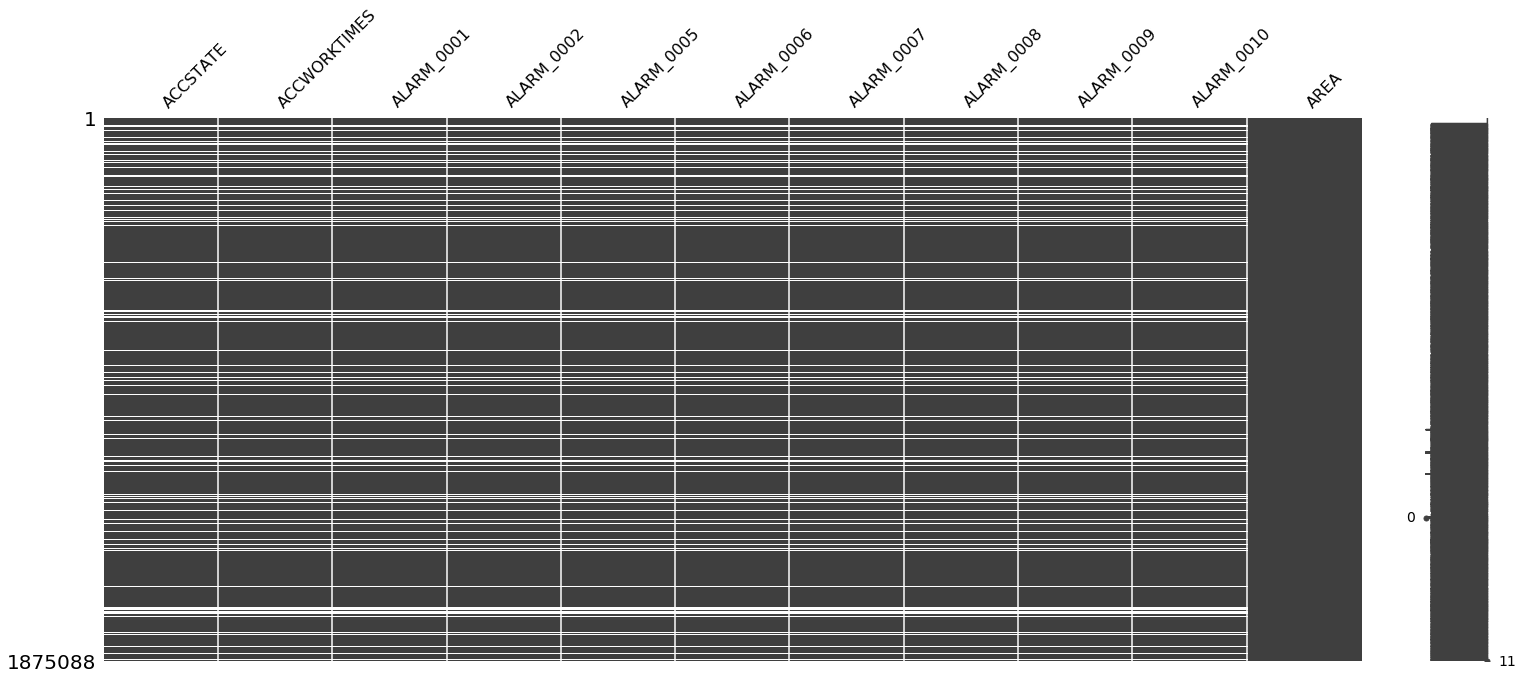

In [9]:
msno.matrix(train[['ACCSTATE','ACCWORKTIMES','ALARM_0001','ALARM_0002','ALARM_0005','ALARM_0006','ALARM_0007','ALARM_0008','ALARM_0009','ALARM_0010','AREA']])

### 单值分析
除了缺失值，还有一种特征对于模型无法带来增益，就是<font color="red"> 所有特征列都是一样</font>的情况，这种数据往往只能给模型带来噪音，所以在所有的数据中，我们选择将其删除。
- 共有8列特征仅仅只包含一个元素值，这些特征列的名称为：
> 'ALARM_0001', 'ALARM_0006', 'CMDTYPE', 'COOLANTLEVEL', 'LOCK_ALL', 'LOWVOLTAGESTATUS', 'SPNCONVERSIONMODE6', 'SPNMSB5'

In [10]:
onlyone_val_columns = train.columns[train.nunique(axis=0) == 1]

In [11]:
print('共有 %i 个特征列仅仅只包含一个元素之，' % len(onlyone_val_columns))
print('这些特征列为: ',onlyone_val_columns )

共有 8 个特征列仅仅只包含一个元素之，
这些特征列为:  Index(['ALARM_0001', 'ALARM_0006', 'CMDTYPE', 'COOLANTLEVEL', 'LOCK_ALL',
       'LOWVOLTAGESTATUS', 'SPNCONVERSIONMODE6', 'SPNMSB5'],
      dtype='object')


In [12]:
train.drop(onlyone_val_columns,axis=1,inplace =True)
test.drop(onlyone_val_columns,axis=1,inplace =True)

### Label转换 & 分析

上面我们删除了很多对于模型训练无用的特征，此处我们对剩余的特征进行重点相关性的分析。首先我们先将我们的类别标签进行拼接。

In [13]:
def SPN_FMI_2_Code(Spn_fmis,Codes):
    spn_fmi_dict = {}
    for i in range(len(Spn_fmis)):
        spn_fmi_dict[Spn_fmis[i]] = Codes[i]
    return spn_fmi_dict

In [14]:
dbd_faultcode['SPN_FMI'] = dbd_faultcode['SPN'].fillna(-1).astype(int).astype(str) + '_' + dbd_faultcode['FMI'].fillna(-1).astype(int).astype(str)
train['SPN_FMI'] = train['SPN'].fillna(-1).astype(int).astype(str) + '_' + train['FMI'].fillna(-1).astype(int).astype(str)

spn_fmi_dict = SPN_FMI_2_Code(dbd_faultcode['SPN_FMI'].values,dbd_faultcode['CODE'].values)
spn_fmi_dict['-1_-1'] = -1

def transfer_2_code(x):
    if x in spn_fmi_dict.keys():
        return spn_fmi_dict[x]
    return -1

train['SPN_FMI_Code']  = train['SPN_FMI'].apply(transfer_2_code)

In [15]:
code_distribution = pd.DataFrame(train['SPN_FMI_Code'].value_counts().reset_index())

In [16]:
code_distribution.columns = ['Code', 'Code_Num']
code_distribution

,Code,Code_Num
0,-1,1649858
1,1206,215738
2,1239,8194
3,1141,1075
4,1182,144
5,1168,41
6,1211,24
7,1216,4
8,1209,4
9,1145,2


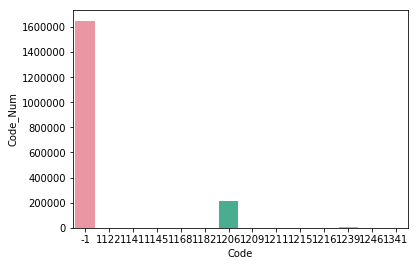

In [17]:
sns.barplot(x ='Code', y = 'Code_Num', data = code_distribution)

为了方便后续的预测,此处我们暂时先选取与我们需要预测相关的标签进行分析。

In [18]:
train_target = train[train.SPN_FMI_Code.isin([1206,1239,1141,1174,1182])]

In [19]:
target_code = [1206,1239,1141,1174,1182] 
dbd_faultcode[dbd_faultcode.CODE.isin(target_code)] 

,CODE,SPN,FMI,DESCRIPTION,ENGINETYPEID,FAULTSOURCE,FAULTNAME,SPN_FMI
7,1182,4641,2,实际共轨压力低于目标值的控制下限,1958,上柴国三,实际共轨压力低于目标值的控制下限,4641_2
31,1206,8809,15,油水分离器中液位过高,1958,上柴国三,油水分离器中液位过高,8809_15
63,1239,108,4,大气压力传感器电压低于下限门槛值,1958,潍柴国三,大气压力传感器电压低于下限门槛值,108_4
220,1141,8480,2,油门踏板传感器#1和#2信号无效,1958,上柴国三,油门踏板传感器#1和#2信号无效,8480_2
251,1174,9779,5,油泵电磁阀#2开路或对地短路,1958,上柴国三,油泵电磁阀#2开路或对地短路,9779_5


### 数据再次清洗
因为刚刚对label进行了清洗，为了分析数据特征与标签之间的关系，我们按照之前的两步对数据再一次进行简单的清洗。数据清洗完毕之后，我们只剩下了15列特征。

In [20]:
all_missing_columns_step2 = train_target.columns[train_target.isnull().sum() == train_target.shape[0]]
onlyone_val_columns_step2  = train_target.columns[train_target.nunique(axis=0) == 1]

In [21]:
train_target.drop(all_missing_columns_step2,axis=1,inplace=True)
train_target.drop(onlyone_val_columns_step2,axis=1,inplace=True)

In [22]:
train_target.shape

(225151, 15)

In [23]:
train_target.head()

,ACCRUNTIMES,AREA,CITY,COLLECTTIME,FAULTTIME,FMI,FRID,LAT,LNG,PROVINCE,READFLAG,SPN,UNIQUENO,SPN_FMI,SPN_FMI_Code
23150,979.0,341322.0,341300.0,2018-04-01 06:23:45,2018-04-01 06:23:45,15.0,2357817.0,34.108867,34.108867,340000.0,1.0,8809.0,201704140835245913,8809_15,1206
23178,979.0,341322.0,341300.0,2018-04-01 06:25:45,2018-04-01 06:25:45,15.0,2357818.0,34.108877,34.108877,340000.0,1.0,8809.0,201704140835245913,8809_15,1206
23208,979.0,341322.0,341300.0,2018-04-01 06:27:45,2018-04-01 06:27:45,15.0,2357819.0,34.108891,34.108891,340000.0,1.0,8809.0,201704140835245913,8809_15,1206
23240,979.0,341322.0,341300.0,2018-04-01 06:29:45,2018-04-01 06:29:45,15.0,2357821.0,34.109057,34.109057,340000.0,1.0,8809.0,201704140835245913,8809_15,1206
23274,979.0,341322.0,341300.0,2018-04-01 06:31:45,2018-04-01 06:31:45,15.0,2357822.0,34.109043,34.109043,340000.0,1.0,8809.0,201704140835245913,8809_15,1206


### 单元变量分析
#### ACCRUNTIMES（油门当前值(%)）
我们发现：
- <font color="red">Code为1239的油门当前值最小为4021%，比其他三个的都要高很多，可以直接通过该值来判别1239这个特征值；</font>
- Code为1206的ACCRUNTIMES的分布较为广泛,和其他特征有较多重叠,1182的特征的ACCRUNTIMES值相对最低,低于800.

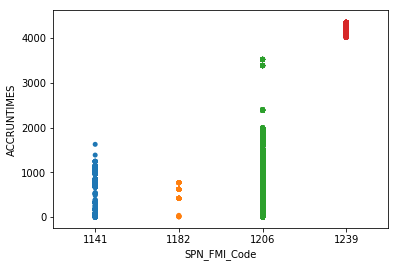

In [24]:
sns.stripplot(x="SPN_FMI_Code", y="ACCRUNTIMES", data=train_target);

In [25]:
test['ACCRUNTIMES'].describe()

count    71559.000000
mean      1054.037354
std        926.316787
min          0.000000
25%        488.000000
50%        897.000000
75%       1211.000000
max       4498.000000
Name: ACCRUNTIMES, dtype: float64

In [26]:
train_target[train_target.SPN_FMI_Code == 1206]['ACCRUNTIMES'].describe()

count    215738.000000
mean        878.156690
std         379.871741
min           0.000000
25%         652.000000
50%         877.000000
75%        1139.000000
max        3527.000000
Name: ACCRUNTIMES, dtype: float64

In [27]:
train_target[train_target.SPN_FMI_Code == 1239]['ACCRUNTIMES'].describe()

count    8194.000000
mean     4199.182695
std        93.519804
min      4021.000000
25%      4119.000000
50%      4191.000000
75%      4281.000000
max      4355.000000
Name: ACCRUNTIMES, dtype: float64

In [28]:
train_target[train_target.SPN_FMI_Code == 1141]['ACCRUNTIMES'].describe()

count    1075.000000
mean      572.342326
std       413.494064
min         0.000000
25%       167.000000
50%       718.000000
75%       973.000000
max      1627.000000
Name: ACCRUNTIMES, dtype: float64

In [29]:
train_target[train_target.SPN_FMI_Code == 1182]['ACCRUNTIMES'].describe()

count    144.000000
mean     550.500000
std      185.069256
min        6.000000
25%      419.000000
50%      620.000000
75%      621.000000
max      771.000000
Name: ACCRUNTIMES, dtype: float64

In [30]:
np.sort(train_target[train_target.SPN_FMI_Code == 1182]['ACCRUNTIMES'].unique())

array([  6.,   7.,  18.,  22.,  39., 418., 419., 620., 621., 770., 771.])

#### READFLAG
通过观察标签与READFLAG的信息，我们发现：
- READFLAG<font color="red">为0的时候只有1206</font>出现了;
- READFLAG为1的时候出现了其他所有的标签。

In [31]:
readflag = pd.DataFrame(train_target.groupby('READFLAG')['SPN_FMI_Code'].value_counts())
readflag.columns = ['show_times']
readflag.reset_index(inplace=True)
readflag.head()

,READFLAG,SPN_FMI_Code,show_times
0,0.0,1206,4581
1,1.0,1206,211157
2,1.0,1239,8194
3,1.0,1141,1075
4,1.0,1182,144


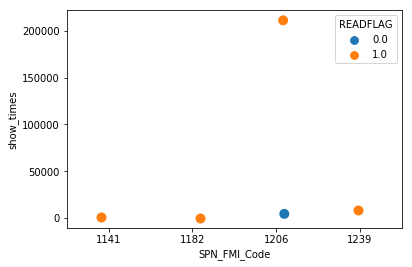

In [32]:
sns.stripplot(x = 'SPN_FMI_Code', y='show_times',hue ='READFLAG',data =readflag, size =10,jitter =True )

In [33]:
features = ['AREA','CITY','COLLECTTIME','FAULTTIME','FRID','LAT','LNG','PROVINCE','UNIQUENO','SPN_FMI_Code']

#### FRID（自动编号）
我们假设<font color="red">相邻编号机器是来自于同一条生产线，出现类似的故障。</font>

此处我们取FRID的前五位标志是否属于同一个生产线，他们之间出现相同问题的概率会较大。

- 我们随机选取故障编号1141作为分析,发现故障1141的FRID_Top5的分布较为广泛，虽然局部存在聚类的情况，例如24116，24117.24118这三个连续的地方出现了非常多的1141故障。

该特征存在一定的聚类情况，后期可以用来平滑预测结果（施加规则修正预测结果）

In [34]:
train_target['FRID_Top5'] = train_target['FRID'].apply(lambda x: int(str(x)[:5]))

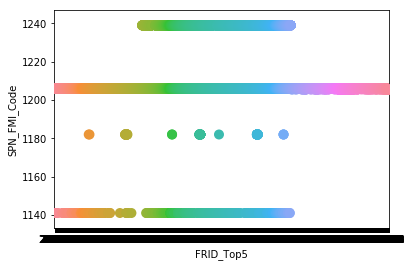

In [35]:
sns.stripplot(x = 'FRID_Top5', y='SPN_FMI_Code',data =train_target.sort_values('FRID_Top5'), size =10,jitter =True )

In [36]:
train_target[train_target.SPN_FMI_Code == 1141]['FRID_Top5'].value_counts()

24117    59
24118    39
24116    37
23952    21
25696    12
24119    10
25314     9
25682     8
25712     8
23797     8
24151     7
24862     7
24909     7
24961     7
25949     7
26219     7
26033     6
24152     6
24068     6
24120     6
26220     6
25429     6
23743     6
25315     6
24908     6
24121     5
24067     5
24159     5
25057     5
25058     5
         ..
26200     1
26017     1
25204     1
23971     1
25200     1
25198     1
25194     1
23922     1
25939     1
23782     1
25420     1
23785     1
23792     1
23798     1
25851     1
23806     1
25436     1
25432     1
23810     1
25391     1
23887     1
25845     1
25366     1
25345     1
25341     1
23839     1
25322     1
23850     1
25905     1
26199     1
Name: FRID_Top5, Length: 394, dtype: int64

In [37]:
cnt = 10
for ind in train_target[train_target.SPN_FMI_Code == 1141]['FRID_Top5'].value_counts().index:
    print(ind, train_target[train_target.FRID_Top5 == ind]['SPN_FMI_Code'].value_counts())
    cnt -= 1
    if cnt==0:
        break

24117 1141    59
1206    27
Name: SPN_FMI_Code, dtype: int64
24118 1206    47
1141    39
Name: SPN_FMI_Code, dtype: int64
24116 1206    45
1141    37
Name: SPN_FMI_Code, dtype: int64
23952 1141    21
1206     8
Name: SPN_FMI_Code, dtype: int64
25696 1206    68
1141    12
Name: SPN_FMI_Code, dtype: int64
24119 1206    69
1141    10
Name: SPN_FMI_Code, dtype: int64
25314 1206    62
1141     9
1239     9
Name: SPN_FMI_Code, dtype: int64
25682 1206    62
1141     8
1239     6
Name: SPN_FMI_Code, dtype: int64
25712 1206    69
1141     8
1239     1
Name: SPN_FMI_Code, dtype: int64
23797 1206    55
1141     8
Name: SPN_FMI_Code, dtype: int64


#### PROVINCE

假设我们在类似的时间段内往相同的城市输送的机械设备拥有类似的属性，即发生相同问题的概率会很大。而且我们发现训练集中出现的所有城市在测试集中也全部都出现了。我们发现下面的规律：
- 设备故障代号为1239的只出现在了PROVINCE代码为15000的城市当中<font color="red">（加上之前我们观察到1239的油门当前值的规律，我们可以直接将城市编号为15000同时油门当前值大于4000的预测为1239）</font>
- 除去1239之外，其他的故障代号的机器分布较为广泛，但是还是有大量的城市仅仅只有代号为1206的。


In [53]:
set(train_target['PROVINCE'].value_counts().index) - set(test['PROVINCE'].unique()) 

set()

In [60]:
province_code_distribution = pd.DataFrame({'PROVINCE':train_target['PROVINCE'].unique()})
codes = [1206,1141,1182,1239 ]
for code in codes:
    province_code_distribution[code] = 0
    province = train_target[train_target.SPN_FMI_Code == code]['PROVINCE'].unique()
    province_code_distribution.loc[province_code_distribution.PROVINCE.isin(province), code] = 1 

In [64]:
province_code_distribution.set_index('PROVINCE',inplace= True)

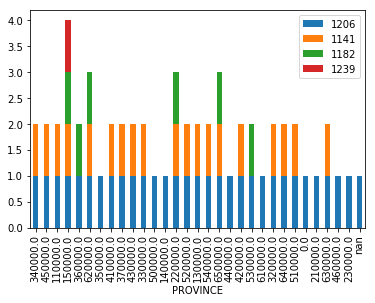

In [65]:
province_code_distribution.plot(kind='bar',stacked=True)

#### AREA
该类可以认为是PROVINCE的子类，分析的思路和PROVINCE类似。

我们发现：
- 当我们划分到具体的区域的时候，很多Area都只存在一种机器故障。<font color="red">此时我们可以通过ont-hot编码或者编码排序的方式</font>得到更好的判别结果。


** 每个区域对应一个省市**， 验证了我们AREA为PROVINCE的子类的猜测。

In [278]:
train_target.groupby('AREA')['CITY'].nunique().sort_values()

AREA
0.0         1
450105.0    1
441802.0    1
441721.0    1
441521.0    1
441323.0    1
441225.0    1
441203.0    1
440983.0    1
433130.0    1
431322.0    1
431321.0    1
430821.0    1
430802.0    1
430611.0    1
430524.0    1
450108.0    1
430503.0    1
450109.0    1
450123.0    1
451423.0    1
451302.0    1
451222.0    1
451123.0    1
451031.0    1
451025.0    1
450923.0    1
450922.0    1
450802.0    1
450603.0    1
450602.0    1
450521.0    1
450502.0    1
450321.0    1
450222.0    1
450122.0    1
430321.0    1
430304.0    1
430302.0    1
411023.0    1
410923.0    1
410782.0    1
410727.0    1
410725.0    1
410704.0    1
410526.0    1
410522.0    1
410503.0    1
410481.0    1
410122.0    1
           ..
370725.0    1
370724.0    1
370705.0    1
370704.0    1
370611.0    1
370521.0    1
370481.0    1
370405.0    1
370321.0    1
370303.0    1
350623.0    1
350125.0    1
341821.0    1
340221.0    1
340203.0    1
340202.0    1
340124.0    1
340123.0    1
340122.0    1
340121.0    1
3

In [121]:
train_target.groupby('AREA')['PROVINCE'].nunique().sort_values()

AREA
0.0         1
450105.0    1
441802.0    1
441721.0    1
441521.0    1
441323.0    1
441225.0    1
441203.0    1
440983.0    1
433130.0    1
431322.0    1
431321.0    1
430821.0    1
430802.0    1
430611.0    1
430524.0    1
450108.0    1
430503.0    1
450109.0    1
450123.0    1
451423.0    1
451302.0    1
451222.0    1
451123.0    1
451031.0    1
451025.0    1
450923.0    1
450922.0    1
450802.0    1
450603.0    1
450602.0    1
450521.0    1
450502.0    1
450321.0    1
450222.0    1
450122.0    1
430321.0    1
430304.0    1
430302.0    1
411023.0    1
410923.0    1
410782.0    1
410727.0    1
410725.0    1
410704.0    1
410526.0    1
410522.0    1
410503.0    1
410481.0    1
410122.0    1
410104.0    1
371728.0    1
371722.0    1
371626.0    1
411327.0    1
411402.0    1
411403.0    1
411502.0    1
430181.0    1
430121.0    1
430111.0    1
421125.0    1
421087.0    1
420902.0    1
420804.0    1
469026.0    1
420626.0    1
420325.0    1
420324.0    1
411729.0    1
411725.0    1
4

In [123]:
area_code_distribution = pd.DataFrame({'AREA':train_target['AREA'].unique()})
codes = [1206,1141,1182,1239 ]
for code in codes:
    area_code_distribution[code] = 0
    area = train_target[train_target.SPN_FMI_Code == code]['AREA'].unique()
    area_code_distribution.loc[area_code_distribution.AREA.isin(area), code] = 1 

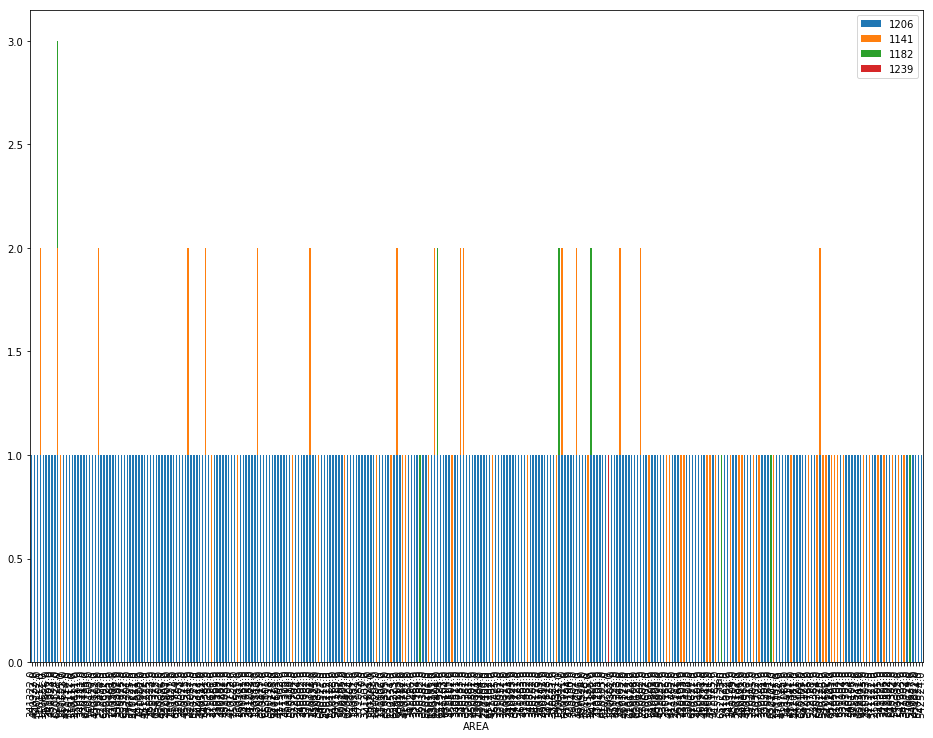

In [133]:
area_code_distribution.set_index('AREA',inplace= True)
area_code_distribution.plot(kind='bar',stacked=True, figsize=[16,12])

#### COLLECTTIME & FAULTTIME

我们发现：
- COLLECTTIME和FAULTTIME是全部一样的，所以我们仅仅只需要选择一个进行分析即可。

此处我们认为在相同时间内的预测结果是可信的，而超过训练集时间的我们认为是较难保证预测准确性的。

- 我们发现训练集和测试集中的时间不在同一个时间段内，如果<font color=red>单独使用该特征并不能给我们带来非常大的帮助</font>。




In [134]:
np.sum(train_target['COLLECTTIME'] == train_target['FAULTTIME'])

225151

In [135]:
train_target.shape

(225151, 17)

In [234]:
print('*'*100,'\n', 'Min time in train dataset is:',train_target['COLLECTTIME'].min(), ' Max time in train dataset is:',train_target['COLLECTTIME'].max())
print('*'*100,'\n', 'Min time in test dataset is:',test['COLLECTTIME'].min(), ' Max time in test dataset is:',test['COLLECTTIME'].max())

**************************************************************************************************** 
 Min time in train dataset is: 2018-04-01 06:23:45  Max time in train dataset is: 2018-04-30 23:58:00
**************************************************************************************************** 
 Min time in test dataset is: 2018-05-01 00:00:03  Max time in test dataset is: 2018-05-10 23:58:58


我们假设在相同时间段检测的产品拥有一定的共性，即如果有个机械设备在某一时间出故障，那么可能在此时间周围出故障的类型是相同的。
- 我们随机选取8天进行观察，发现基本满足我们的假设。

In [282]:
train_target['COLLECTTIME'] = pd.to_datetime(train_target['COLLECTTIME'])
train_target['Day']         = train_target['COLLECTTIME'].apply(lambda x:x.day)
train_target['Hour']        = train_target['COLLECTTIME'].apply(lambda x:x.hour)
train_target['Minute']      = train_target['COLLECTTIME'].apply(lambda x:x.minute)

In [285]:
train_target.head()

,ACCRUNTIMES,AREA,CITY,COLLECTTIME,FAULTTIME,FMI,FRID,LAT,LNG,PROVINCE,READFLAG,SPN,UNIQUENO,SPN_FMI,SPN_FMI_Code,FRID_Top5,UNIQUENO_LAST4,Day,Hour,Minute
23150,979.0,341322.0,341300.0,2018-04-01 06:23:45,2018-04-01 06:23:45,15.0,2357817.0,34.108867,34.108867,340000.0,1.0,8809.0,201704140835245913,8809_15,1206,23578,591,1,6,23
23178,979.0,341322.0,341300.0,2018-04-01 06:25:45,2018-04-01 06:25:45,15.0,2357818.0,34.108877,34.108877,340000.0,1.0,8809.0,201704140835245913,8809_15,1206,23578,591,1,6,25
23208,979.0,341322.0,341300.0,2018-04-01 06:27:45,2018-04-01 06:27:45,15.0,2357819.0,34.108891,34.108891,340000.0,1.0,8809.0,201704140835245913,8809_15,1206,23578,591,1,6,27
23240,979.0,341322.0,341300.0,2018-04-01 06:29:45,2018-04-01 06:29:45,15.0,2357821.0,34.109057,34.109057,340000.0,1.0,8809.0,201704140835245913,8809_15,1206,23578,591,1,6,29
23274,979.0,341322.0,341300.0,2018-04-01 06:31:45,2018-04-01 06:31:45,15.0,2357822.0,34.109043,34.109043,340000.0,1.0,8809.0,201704140835245913,8809_15,1206,23578,591,1,6,31


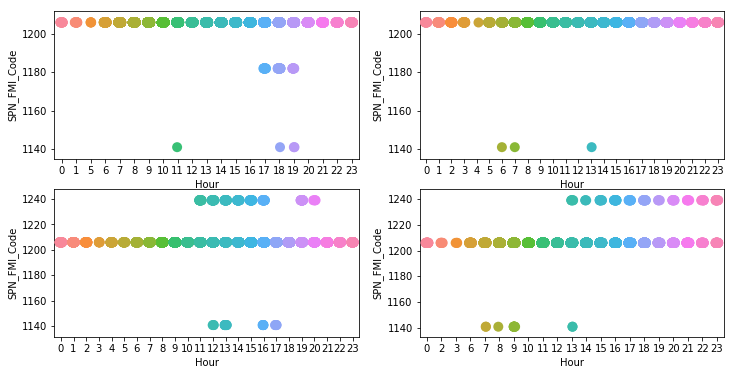

In [302]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize = [12,6]) 
train_target_10 = train_target.loc[train_target.Day == 10] 
train_target_11 = train_target.loc[train_target.Day == 11] 
train_target_12 = train_target.loc[train_target.Day == 12] 
train_target_13 = train_target.loc[train_target.Day == 13] 
sns.stripplot(x = 'Hour', y='SPN_FMI_Code',data =train_target_10.sort_values('Hour'), size =10,jitter =True,ax=ax[0,0])
sns.stripplot(x = 'Hour', y='SPN_FMI_Code',data =train_target_11.sort_values('Hour'), size =10,jitter =True,ax=ax[0,1])
sns.stripplot(x = 'Hour', y='SPN_FMI_Code',data =train_target_12.sort_values('Hour'), size =10,jitter =True,ax=ax[1,0])
sns.stripplot(x = 'Hour', y='SPN_FMI_Code',data =train_target_13.sort_values('Hour'), size =10,jitter =True,ax=ax[1,1])

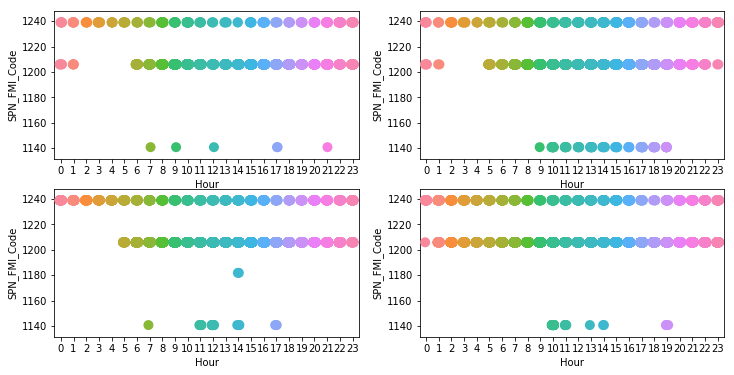

In [306]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize = [12,6]) 
train_target_14 = train_target.loc[train_target.Day == 14] 
train_target_15 = train_target.loc[train_target.Day == 15] 
train_target_16 = train_target.loc[train_target.Day == 16] 
train_target_17 = train_target.loc[train_target.Day == 17] 
sns.stripplot(x = 'Hour', y='SPN_FMI_Code',data =train_target_14.sort_values('Hour'), size =10,jitter =True,ax=ax[0,0])
sns.stripplot(x = 'Hour', y='SPN_FMI_Code',data =train_target_15.sort_values('Hour'), size =10,jitter =True,ax=ax[0,1])
sns.stripplot(x = 'Hour', y='SPN_FMI_Code',data =train_target_16.sort_values('Hour'), size =10,jitter =True,ax=ax[1,0])
sns.stripplot(x = 'Hour', y='SPN_FMI_Code',data =train_target_17.sort_values('Hour'), size =10,jitter =True,ax=ax[1,1])

#### UNIQUENO

上面我们对采集时间进行了分析，下面我们对另外一个特征列UNIQUENO进行分析。我们可以得到如下的结论：

- UNIQUENO拥有一定的结构性，前面是日期属性,后面是产品代号，例如：
> 201701241116166406, 前面的20170124111616就是时间属性2017:01:24,11:16:16,可能是产品生产出来的时间，最后几位是产品的代号。

- 我们发现该类特征具有较强的聚类属性， <font color="red">同一个UNIQUENO往往只对应一种错误的故障代码（仅有少量的两个对应了两个故障代码）</font>。


In [327]:
train_target['UNIQUENO'].value_counts().head(6)

201704241116166406    8194
201705201829567748    7732
201705241030007990    7012
201705101530077175    4938
201704180930016169    4575
201701201030011850    4316
Name: UNIQUENO, dtype: int64

我们发现该类特征具有较强的聚类属性， 同一个UNIQUENO往往只对应一种错误的故障代码（仅有少量的两个对应了两个故障代码）。

In [332]:
train_target.groupby('UNIQUENO')['SPN_FMI_Code'].nunique().sort_values().tail(10)

UNIQUENO
201704131442275879    1
201704150830046013    1
201704150830046014    1
201705151007377433    2
201701231030031929    2
201703301130045382    2
201704111435245794    2
201804081727258207    2
201704111435245782    2
201702211030013081    2
Name: SPN_FMI_Code, dtype: int64

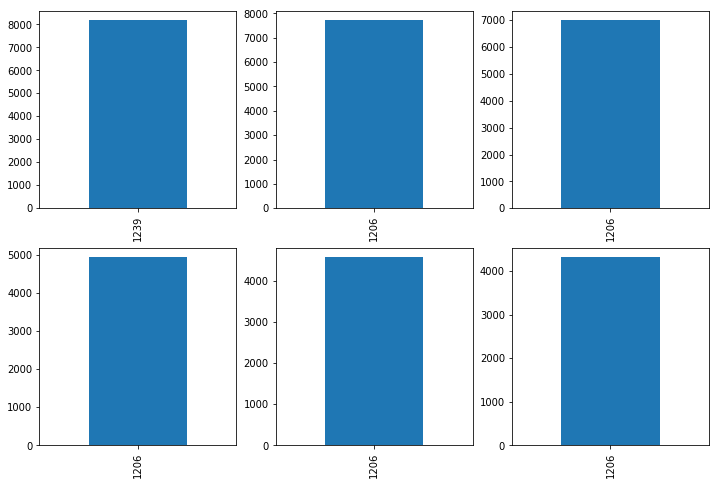

In [333]:
fig, ax = plt.subplots(nrows=2, ncols=3,figsize = [12,8]) 
train_target_UNIQUENO_1 = train_target.loc[train_target.UNIQUENO == 201704241116166406]['SPN_FMI_Code'].value_counts()
train_target_UNIQUENO_2 = train_target.loc[train_target.UNIQUENO == 201705201829567748]['SPN_FMI_Code'].value_counts() 
train_target_UNIQUENO_3 = train_target.loc[train_target.UNIQUENO == 201705241030007990]['SPN_FMI_Code'].value_counts() 
train_target_UNIQUENO_4 = train_target.loc[train_target.UNIQUENO == 201705101530077175]['SPN_FMI_Code'].value_counts() 
train_target_UNIQUENO_5 = train_target.loc[train_target.UNIQUENO == 201704180930016169]['SPN_FMI_Code'].value_counts() 
train_target_UNIQUENO_6 = train_target.loc[train_target.UNIQUENO == 201701201030011850]['SPN_FMI_Code'].value_counts()  

train_target_UNIQUENO_1.plot(kind='bar',stacked=False,ax=ax[0,0])
train_target_UNIQUENO_2.plot(kind='bar',stacked=False,ax=ax[0,1])
train_target_UNIQUENO_3.plot(kind='bar',stacked=False,ax=ax[0,2])
train_target_UNIQUENO_4.plot(kind='bar',stacked=False,ax=ax[1,0])
train_target_UNIQUENO_5.plot(kind='bar',stacked=False,ax=ax[1,1])
train_target_UNIQUENO_6.plot(kind='bar',stacked=False,ax=ax[1,2])  

对应两种编码的时候基本其中一种也占据了较大的优势。

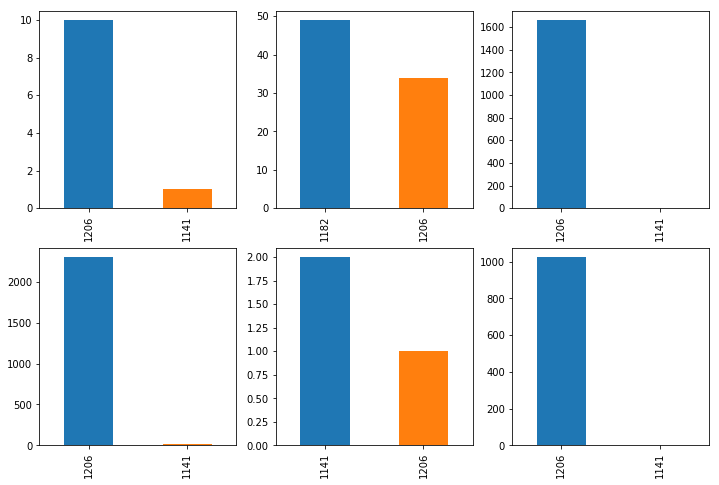

In [331]:
fig, ax = plt.subplots(nrows=2, ncols=3,figsize = [12,8]) 
train_target_UNIQUENO_1 = train_target.loc[train_target.UNIQUENO == 201705151007377433]['SPN_FMI_Code'].value_counts()
train_target_UNIQUENO_2 = train_target.loc[train_target.UNIQUENO == 201701231030031929]['SPN_FMI_Code'].value_counts() 
train_target_UNIQUENO_3 = train_target.loc[train_target.UNIQUENO == 201703301130045382]['SPN_FMI_Code'].value_counts() 
train_target_UNIQUENO_4 = train_target.loc[train_target.UNIQUENO == 201704111435245794]['SPN_FMI_Code'].value_counts() 
train_target_UNIQUENO_5 = train_target.loc[train_target.UNIQUENO == 201804081727258207]['SPN_FMI_Code'].value_counts() 
train_target_UNIQUENO_6 = train_target.loc[train_target.UNIQUENO == 201704111435245782]['SPN_FMI_Code'].value_counts()  

train_target_UNIQUENO_1.plot(kind='bar',stacked=False,ax=ax[0,0])
train_target_UNIQUENO_2.plot(kind='bar',stacked=False,ax=ax[0,1])
train_target_UNIQUENO_3.plot(kind='bar',stacked=False,ax=ax[0,2])
train_target_UNIQUENO_4.plot(kind='bar',stacked=False,ax=ax[1,0])
train_target_UNIQUENO_5.plot(kind='bar',stacked=False,ax=ax[1,1])
train_target_UNIQUENO_6.plot(kind='bar',stacked=False,ax=ax[1,2])  

In [335]:
train_target.head()

,ACCRUNTIMES,AREA,CITY,COLLECTTIME,FAULTTIME,FMI,FRID,LAT,LNG,PROVINCE,READFLAG,SPN,UNIQUENO,SPN_FMI,SPN_FMI_Code,FRID_Top5,UNIQUENO_LAST4,Day,Hour,Minute
23150,979.0,341322.0,341300.0,2018-04-01 06:23:45,2018-04-01 06:23:45,15.0,2357817.0,34.108867,34.108867,340000.0,1.0,8809.0,201704140835245913,8809_15,1206,23578,591,1,6,23
23178,979.0,341322.0,341300.0,2018-04-01 06:25:45,2018-04-01 06:25:45,15.0,2357818.0,34.108877,34.108877,340000.0,1.0,8809.0,201704140835245913,8809_15,1206,23578,591,1,6,25
23208,979.0,341322.0,341300.0,2018-04-01 06:27:45,2018-04-01 06:27:45,15.0,2357819.0,34.108891,34.108891,340000.0,1.0,8809.0,201704140835245913,8809_15,1206,23578,591,1,6,27
23240,979.0,341322.0,341300.0,2018-04-01 06:29:45,2018-04-01 06:29:45,15.0,2357821.0,34.109057,34.109057,340000.0,1.0,8809.0,201704140835245913,8809_15,1206,23578,591,1,6,29
23274,979.0,341322.0,341300.0,2018-04-01 06:31:45,2018-04-01 06:31:45,15.0,2357822.0,34.109043,34.109043,340000.0,1.0,8809.0,201704140835245913,8809_15,1206,23578,591,1,6,31


In [236]:
print('*'*100,'\n', 'Min time in train dataset is:',train_target['UNIQUENO'].min(), ' Max time in train dataset is:',train_target['UNIQUENO'].max())
print('*'*100,'\n', 'Min time in test dataset is:',test['UNIQUENO'].min(), ' Max time in test dataset is:',test['UNIQUENO'].max())

**************************************************************************************************** 
 Min time in train dataset is: 201607080830045784  Max time in train dataset is: 201804302129198903
**************************************************************************************************** 
 Min time in test dataset is: 201607080830045784  Max time in test dataset is: 201805081928459051


- 有大约93.9627%的UNIQUENO出现在测试集中。

In [362]:
uniquenos = train_target['UNIQUENO'].unique() 
print('There are about %f data in test data have the same UNIQUENO in train data set' % (test.loc[test.UNIQUENO.isin(uniquenos)].shape[0] / test.shape[0]))

There are about 0.939672 data in test data have the same UNIQUENO in train data set


# 小结

我们发现:通过细心的eda我们可以将一个100多维特征的数据转换为20维度不到的数据,再通过单元变量的分析(变量与变量,变量与标签)可以得到每个变量之间以及变量与标签之间的关系,从而可以初步判断出每个单元变量的重要性。此外,通过分析,我们还发现有一些强相关的特征能帮我们直接拿到测试集的标签。